### Computer Vision Project

## Emotion detection of election pictures

### Project description:

In this project I collected 92 pictures (of 46 women, and of 46 men) of those running for the 2022 Finnish regional election. These pictures were collected from an 'election machine' which purpose is to give the citizens a quizz of election issues and once completed, recommend candidates with the most similar answers (access: https://vaalikone.yle.fi/aluevaalit2022/9/ehdokkaat) 

The goal of this project is to examine what kind of emotions are the most typical ones among those running for the election as well as to see whether there are notable differences between the male and female candidates. It has been noted that most  existing research on political images has focused on how political figures portray themselves on television. Therefore there is need for more focus on actual pictures that politicians choose to disseminate of themselves (Bossetta & Schmøkel, 2022, p. 49). 
Previous research (e.g Koo, 2022; Boussalis et al., 2022) has found that women tend to smile more in election campaing photos compared to their male counterparts. This project aims to contribute to this strand of research and provide an additional case study.



## 1. Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import cv2

## 2. Importing and saving the image files

In this part, I first downloaded and saved the images from my Google drive. Next I read the images and converted them into numpy arrays in order to be able to access the images for processing.

In [2]:
# Saving images from a zip file (Google drive)
import urllib.request

# Female candidates
url_w = "https://docs.google.com/uc?export=download&id=15mjJl3LtL3vGWC5FARfE96p7P-Sgfhv3"
fp_w = "w.zip"
urllib.request.urlretrieve(url_w, fp_w)

('w.zip', <http.client.HTTPMessage at 0x7f16d5979870>)

In [3]:
# Male canditates
url_m = "https://docs.google.com/uc?export=download&id=1MmFSbOltX9z7wlg8v37krjLaL3NeKWSh"
fp_m = "m.zip"
urllib.request.urlretrieve(url_m, fp_m)

('m.zip', <http.client.HTTPMessage at 0x7f16d59799c0>)

In [4]:
# Reading images and coverting into numpy arrays

import zipfile
from PIL import Image

# Male candidates

imgzip = zipfile.ZipFile("m.zip")
inflist = imgzip.infolist()

m_image_list = []
for f in inflist:
 ifile = imgzip.open(f)
 img_m = Image.open(ifile)
 m_image_list.append(np.array(img_m))

# Female candidates

imgzip = zipfile.ZipFile("w.zip")
inflist = imgzip.infolist()

w_image_list = []
for f in inflist:
 ifile = imgzip.open(f)
 img_w = Image.open(ifile)
 w_image_list.append(np.array(img_w))

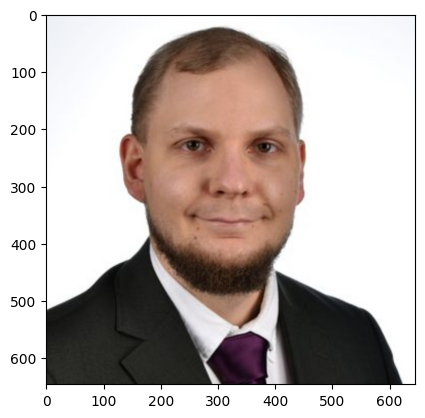

In [5]:
# Displaying couple of images to test if the above steps worked

plt.imshow(m_image_list[0])
plt.show()

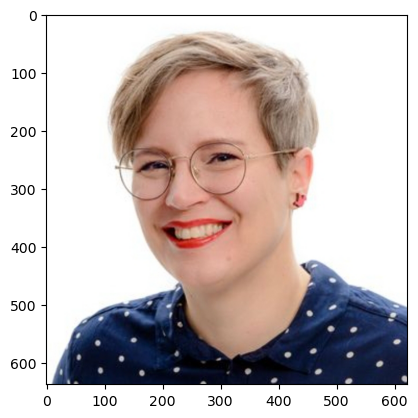

In [ ]:
plt.imshow(w_image_list[20])
plt.show()

## 3. Resizing images

The resizing of the images is important to ease the load of further image processing and analysis.

Looking at the displayed images above, it looks that sizes of the images are around little over 600x600 pixels. The width and height ratio seems pretty equal so distorsion shouldn't be a problem. 

I resized the images to 300x300. I have left the size relative large here since as noted by Szeliski (2022) it can become hard to detected faces if the images are on the smaller side (p. 294).

In [ ]:
# Resizing the images of the male canditates

for i in range(len(m_image_list)):
    m_image_list[i] = np.array(Image.fromarray(m_image_list[i]).resize((300, 300)))

In [ ]:
# Resizing the images of the female canditates

for i in range(len(w_image_list)):
    w_image_list[i] = np.array(Image.fromarray(w_image_list[i]).resize((300, 300)))

## 4. Pre-processing the images

Before the actual analysis, I did some further pre-processing steps. I first saved images as jpg files to lists and renamed the images for a simplicity. I also converted the images from BGR to RGB. 

In [ ]:
# Saving and renaming the images

# Male candidates

image_file_list_m = []
for i in range(len(m_image_list)):
    # Save the numpy array as an image file
    img_file_m = f"m_image_{i}.jpg"
    cv2.imwrite(img_file_m, m_image_list[i])

    image_file_list_m.append(img_file_m)

display(image_file_list_m)

['m_image_0.jpg',
 'm_image_1.jpg',
 'm_image_2.jpg',
 'm_image_3.jpg',
 'm_image_4.jpg',
 'm_image_5.jpg',
 'm_image_6.jpg',
 'm_image_7.jpg',
 'm_image_8.jpg',
 'm_image_9.jpg',
 'm_image_10.jpg',
 'm_image_11.jpg',
 'm_image_12.jpg',
 'm_image_13.jpg',
 'm_image_14.jpg',
 'm_image_15.jpg',
 'm_image_16.jpg',
 'm_image_17.jpg',
 'm_image_18.jpg',
 'm_image_19.jpg',
 'm_image_20.jpg',
 'm_image_21.jpg',
 'm_image_22.jpg',
 'm_image_23.jpg',
 'm_image_24.jpg',
 'm_image_25.jpg',
 'm_image_26.jpg',
 'm_image_27.jpg',
 'm_image_28.jpg',
 'm_image_29.jpg',
 'm_image_30.jpg',
 'm_image_31.jpg',
 'm_image_32.jpg',
 'm_image_33.jpg',
 'm_image_34.jpg',
 'm_image_35.jpg',
 'm_image_36.jpg',
 'm_image_37.jpg',
 'm_image_38.jpg',
 'm_image_39.jpg',
 'm_image_40.jpg',
 'm_image_41.jpg',
 'm_image_42.jpg',
 'm_image_43.jpg',
 'm_image_44.jpg',
 'm_image_45.jpg']

In [ ]:
# Female candidates

image_file_list_w = []
for i in range(len(w_image_list)):
    # Save the numpy array as an image file
    img_file_w = f"w_image_{i}.jpg"
    cv2.imwrite(img_file_w, w_image_list[i])

    image_file_list_w.append(img_file_w)

display(image_file_list_w)

['w_image_0.jpg',
 'w_image_1.jpg',
 'w_image_2.jpg',
 'w_image_3.jpg',
 'w_image_4.jpg',
 'w_image_5.jpg',
 'w_image_6.jpg',
 'w_image_7.jpg',
 'w_image_8.jpg',
 'w_image_9.jpg',
 'w_image_10.jpg',
 'w_image_11.jpg',
 'w_image_12.jpg',
 'w_image_13.jpg',
 'w_image_14.jpg',
 'w_image_15.jpg',
 'w_image_16.jpg',
 'w_image_17.jpg',
 'w_image_18.jpg',
 'w_image_19.jpg',
 'w_image_20.jpg',
 'w_image_21.jpg',
 'w_image_22.jpg',
 'w_image_23.jpg',
 'w_image_24.jpg',
 'w_image_25.jpg',
 'w_image_26.jpg',
 'w_image_27.jpg',
 'w_image_28.jpg',
 'w_image_29.jpg',
 'w_image_30.jpg',
 'w_image_31.jpg',
 'w_image_32.jpg',
 'w_image_33.jpg',
 'w_image_34.jpg',
 'w_image_35.jpg',
 'w_image_36.jpg',
 'w_image_37.jpg',
 'w_image_38.jpg',
 'w_image_39.jpg',
 'w_image_40.jpg',
 'w_image_41.jpg',
 'w_image_42.jpg',
 'w_image_43.jpg',
 'w_image_44.jpg',
 'w_image_45.jpg']

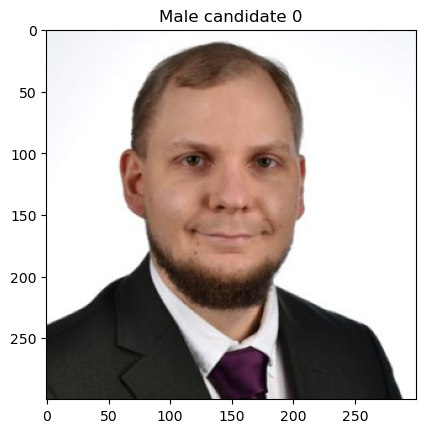

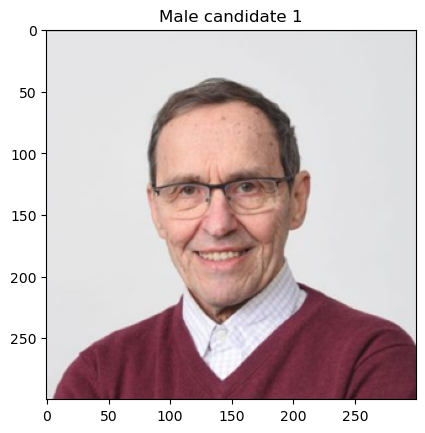

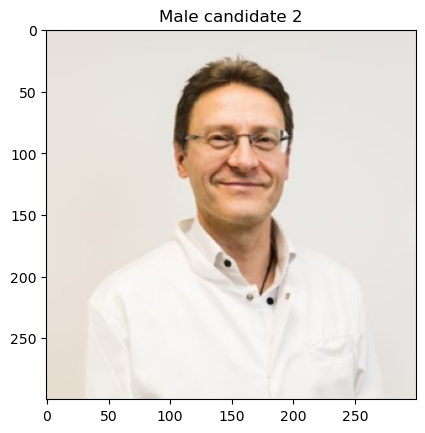

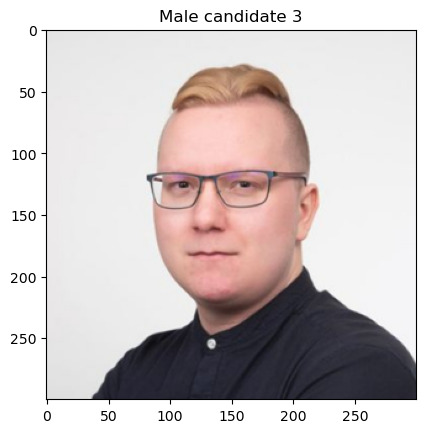

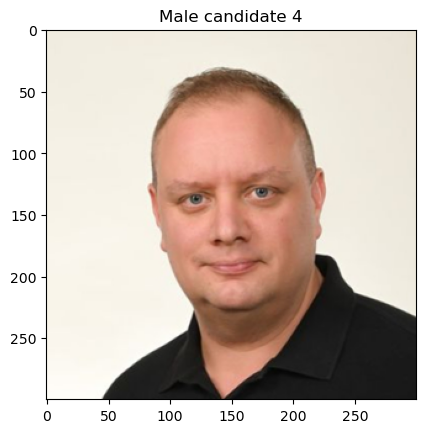

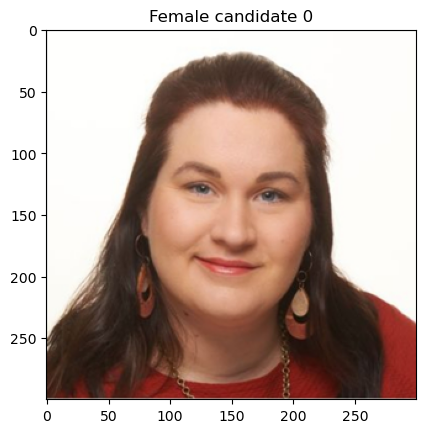

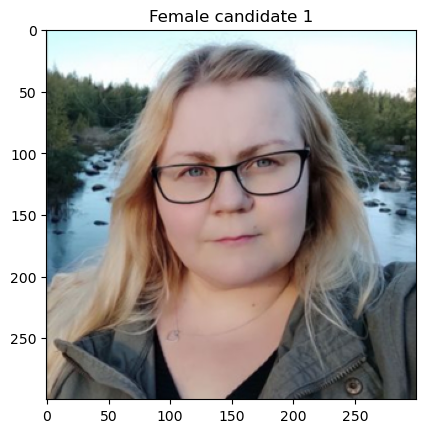

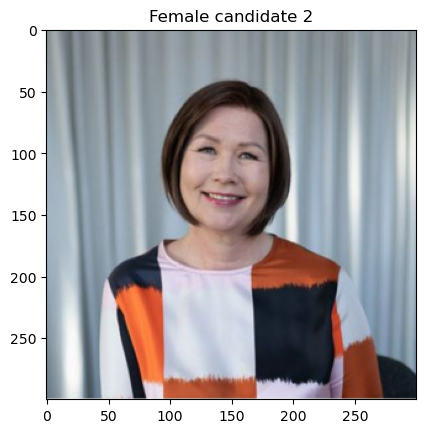

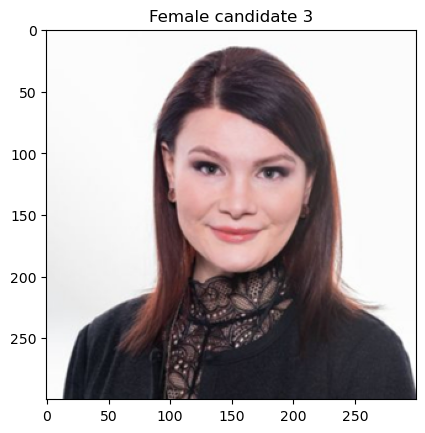

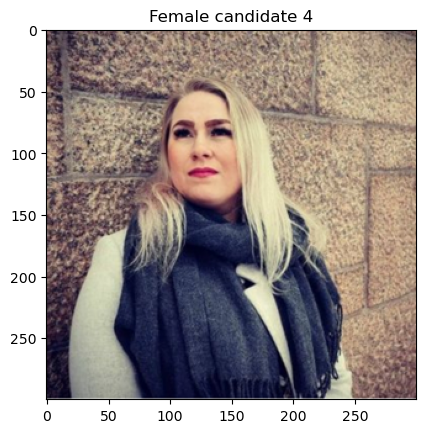

In [ ]:
# Plotting the first 5 male images

for i in range(5):
    plt.imshow(m_image_list[i])
    plt.title(f"Male candidate {i}")
    plt.show()

# Plotting the first 5 female images

for i in range(5):
    plt.imshow(w_image_list[i])
    plt.title(f"Female candidate {i}")
    plt.show()



In [ ]:
# Converting the images from BGR to RGB

# Male candidates

for i in range(len(m_image_list)):
    m_image_list[i] = cv2.cvtColor(m_image_list[i], cv2.COLOR_BGR2RGB)

# Female candidates

for i in range(len(w_image_list)):
    w_image_list[i] = cv2.cvtColor(w_image_list[i], cv2.COLOR_BGR2RGB)


## 5. Emotion detection

After all of the pre-processing steps, I started the actual analysis with the aim detecting the most dominant emotion of each candidate.

The emotion detection analysis was done using the pre-trained DeepFace library. DeepFace will go through each image will give percentages for each of the 7 basic human emotions, as well as which is the most dominant one.



In [ ]:
#!pip install deepface
from deepface import DeepFace

In [ ]:
# Extracting the emotion scores

# Male candidates
male_emotions = []
for i in range(len(m_image_list)):
    male_emotions.append(DeepFace.analyze(m_image_list[i], ["emotion"],enforce_detection=False))

# Female candidates
female_emotions = []
for i in range(len(w_image_list)):
    female_emotions.append(DeepFace.analyze(w_image_list[i], ["emotion"],enforce_detection=False))



Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.26it/s]


In [ ]:
# Checking the length in order to confirm that the analysis worked

# Male candidates

len(male_emotions)

46

In [ ]:
# Female candidates

len(female_emotions)

46

Checking the length ensures that all the images were included in the analysis and that none images were skipped or didn't receive the emotion score. On that front everything is good since we originally had 46 images for each gender and after the analysis we see the same mumbers. 

Next I wanted to see the actual output of the analysis.

In [ ]:
# Checking the result

print(male_emotions)

[[{'emotion': {'angry': 0.0018291000013704413, 'disgust': 9.787188136817962e-10, 'fear': 3.542355029505215e-05, 'happy': 94.35702528697404, 'sad': 0.004786689818229665, 'surprise': 0.0016413437220463513, 'neutral': 5.634685569088791}, 'dominant_emotion': 'happy', 'region': {'x': 75, 'y': 51, 'w': 150, 'h': 150}}], [{'emotion': {'angry': 8.297879716678835e-07, 'disgust': 1.926459651529075e-30, 'fear': 2.8157955065515314e-18, 'happy': 99.99995231628418, 'sad': 8.53138784254583e-14, 'surprise': 1.7036475312079413e-13, 'neutral': 5.3185897286311956e-05}, 'dominant_emotion': 'happy', 'region': {'x': 70, 'y': 75, 'w': 140, 'h': 140}}], [{'emotion': {'angry': 2.7450232462216934e-14, 'disgust': 1.0197890567265434e-24, 'fear': 7.902850691455936e-14, 'happy': 99.99938607212222, 'sad': 6.017429565629129e-13, 'surprise': 1.1722614680676572e-10, 'neutral': 0.0006160391789060155}, 'dominant_emotion': 'happy', 'region': {'x': 106, 'y': 48, 'w': 104, 'h': 104}}], [{'emotion': {'angry': 0.6095643984266

The above result shows that the analysis was successful. However, the results are a bit difficult to read. Therefore, I wanted to have a list of just the most dominant emotions of each candidate as this ultimately the only result I am interested in.

In [ ]:
# Printing the results of the most dominant emotions 

# Male candidates

for i, male_emotion in enumerate(male_emotions):
    print(f"Male candidate {i+1}:")
    print(f"Dominant emotion: {male_emotion[0]['dominant_emotion']}")


Male candidate 1:
Dominant emotion: happy
Male candidate 2:
Dominant emotion: happy
Male candidate 3:
Dominant emotion: happy
Male candidate 4:
Dominant emotion: fear
Male candidate 5:
Dominant emotion: neutral
Male candidate 6:
Dominant emotion: neutral
Male candidate 7:
Dominant emotion: happy
Male candidate 8:
Dominant emotion: neutral
Male candidate 9:
Dominant emotion: fear
Male candidate 10:
Dominant emotion: fear
Male candidate 11:
Dominant emotion: sad
Male candidate 12:
Dominant emotion: happy
Male candidate 13:
Dominant emotion: neutral
Male candidate 14:
Dominant emotion: happy
Male candidate 15:
Dominant emotion: neutral
Male candidate 16:
Dominant emotion: neutral
Male candidate 17:
Dominant emotion: happy
Male candidate 18:
Dominant emotion: happy
Male candidate 19:
Dominant emotion: neutral
Male candidate 20:
Dominant emotion: angry
Male candidate 21:
Dominant emotion: happy
Male candidate 22:
Dominant emotion: neutral
Male candidate 23:
Dominant emotion: neutral
Male ca

In [ ]:
# Female candidates

for i, female_emotion in enumerate(female_emotions):
    print(f"Female candidate {i+1}:")
    print(f"Dominant emotion: {female_emotion[0]['dominant_emotion']}")

Female candidate 1:
Dominant emotion: happy
Female candidate 2:
Dominant emotion: disgust
Female candidate 3:
Dominant emotion: happy
Female candidate 4:
Dominant emotion: happy
Female candidate 5:
Dominant emotion: neutral
Female candidate 6:
Dominant emotion: happy
Female candidate 7:
Dominant emotion: happy
Female candidate 8:
Dominant emotion: happy
Female candidate 9:
Dominant emotion: happy
Female candidate 10:
Dominant emotion: happy
Female candidate 11:
Dominant emotion: happy
Female candidate 12:
Dominant emotion: happy
Female candidate 13:
Dominant emotion: happy
Female candidate 14:
Dominant emotion: happy
Female candidate 15:
Dominant emotion: surprise
Female candidate 16:
Dominant emotion: happy
Female candidate 17:
Dominant emotion: happy
Female candidate 18:
Dominant emotion: happy
Female candidate 19:
Dominant emotion: angry
Female candidate 20:
Dominant emotion: happy
Female candidate 21:
Dominant emotion: happy
Female candidate 22:
Dominant emotion: happy
Female candi

These lists show the results of the analysis. It quite clear to examine what is the most dominant emotion of each candidate. 

However, comparing the results between the female and candidates, which was an important goal of this project, was not the simplest thing do with the above way of looking at results. Therefore some visualization was needed.

## 6. Visualization of the results

The goal of plotting these results is to have a simple way of examining which are the most dominant emotions for both the male and female candidates. Two seperate bar plots detailing the count of each dominant emotion were the chosen plotting method in this project. With this, it is easy to not only to see which are the dominant emotions but also compare the results between the men and women.

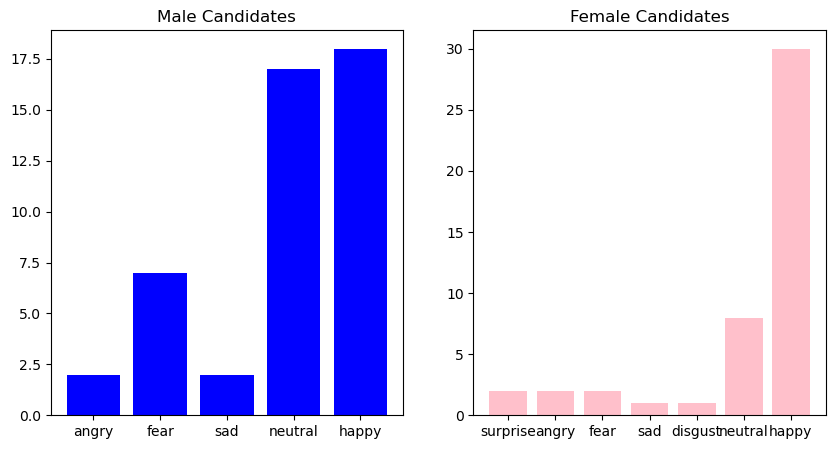

In [ ]:
import matplotlib.pyplot as plt

male_dominant_emotions = [data[0]["dominant_emotion"] for data in male_emotions]
female_dominant_emotions = [data[0]["dominant_emotion"] for data in female_emotions]

# Count occurrences of each dominant emotion

male_counts = {emotion: male_dominant_emotions.count(emotion) for emotion in set(male_dominant_emotions)}
female_counts = {emotion: female_dominant_emotions.count(emotion) for emotion in set(female_dominant_emotions)}

# Plot bar plots

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(male_counts.keys(), male_counts.values(), color='blue')
ax[0].set_title("Male Candidates")
ax[1].bar(female_counts.keys(), female_counts.values(), color='pink')
ax[1].set_title("Female Candidates")
plt.show()




I also wanted view the absolute counts of each dominant emotion

In [ ]:
print(male_counts)

{'angry': 2, 'fear': 7, 'sad': 2, 'neutral': 17, 'happy': 18}


In [ ]:
print(female_counts)

{'surprise': 2, 'angry': 2, 'fear': 2, 'sad': 1, 'disgust': 1, 'neutral': 8, 'happy': 30}


## 7. Summary of the findings

This notebook has examined 92 images of individuals running for the 2022 Finnish regional election, pre-processed the images and noted the counts of the most dominant emotions separately for both male and female candidates. 

For both genders, happy emotion is the most common one. Bossetta & Schmøkel (2022) similarly found that the politicians most typically post happy pictures of themselves. They argue that this not untypical in cases where the politicians have the control over their messaging (p. 64). 

While 'happy' is the predominant emotion for both genders it is also that clear that neutral emotion is much more common among the men compared to the women. This suggests that women typically smile more in their election campaign/political messaging pictures, thus confirming the findings of some previous studies (Koo, 2022; Boussalis et al., 2022). There could be many reasons for this. Koo (2022) for example argues that this partly due to gender stereotypes (p.7) and also because women tend to perform better elections if their election campaign images are happy and positive (smile in the photo) while for the male candidates it didn't really matter for election result whether they smiled or not (p.3). Boussalis et al. (2022) additionally argue that more emonational labour (particularly in expressing positive emotions) is expected of women (p. 18). 

This project has provided a good new case study of the phenomenon of women portraying themselves more happy than the men during political campaigning. However, the sample size of this project is quite small. Because of this, much bigger sample should be used in order to confirm the findings and make any significant conclusions.

## 8. References

Szeliski, R. (2022). Computer vision: algorithms and applications. Springer Nature.

Bossetta, M., & Schmøkel, R. (2022). Cross-platform emotions and audience engagement in social media political campaigning: Comparing candidates’ Facebook and Instagram images in the 2020 US election. Political Communication, 1-21.

Koo, S. (2022). Leading or cheer-leading? The gender gap in political smiles. Politics & Gender, 18(1), 183-211.

Boussalis, C., Coan, T., & Holman, M. (2022). Mad, sad, and glad: how men and women in politics communicate using images and emotions. OSF